# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [41]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# import data 
transacts_df = pd.read_csv("../data/bank_transactions.csv")

transacts_df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [43]:
# rename coloumn for consistency
transacts_df =  transacts_df.rename(columns={'oldbalanceOrg' : 'oldbalanceOrig'})
transacts_df.head()

,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


## Univariate analysis

In [44]:
# counts and percentage function for despcriptive stats, resuse, and simplicity
def show_class_distribution(df, target_col, label="Dataset"):
    """
    Prints the class distribution (counts and percentages) for any target column.

    Args:
        df (pd.DataFrame): DataFrame to analyze
        target_col (str): Column name to analyze (e.g., 'isFraud', 'isFlaggedFraud')
        label (str): Custom label for clarity
    """
    if target_col not in df.columns:
        print(f"🚫 ERROR: '{target_col}' not found in DataFrame columns.")
        print("📦 Available columns:", df.columns.tolist())
        return

    print(f"\n💹 Class distribution in {label} → (column: '{target_col}'):")
    counts = df[target_col].value_counts()
    percentages = df[target_col].value_counts(normalize=True) * 100
    dist_df = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percentages.round(3)
    })
    print(dist_df)


In [45]:
# DIsplay information about data structures, etc.
transacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrig  1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


In [46]:
# predefined funciton show_class_distribution()
show_class_distribution(transacts_df, target_col='isFraud', label="Original Dataset")


💹 Class distribution in Original Dataset → (column: 'isFraud'):
          Count  Percentage (%)
isFraud                        
0        998703           99.87
1          1297            0.13


In [47]:
# TODO: view the shape of your data
transacts_df.shape

(1000000, 10)

In [48]:
show_class_distribution(transacts_df, target_col='isFlaggedFraud', label="Original Dataset")


💹 Class distribution in Original Dataset → (column: 'isFlaggedFraud'):
                 Count  Percentage (%)
isFlaggedFraud                        
0               999999           100.0
1                    1             0.0


In [49]:
# create sample of original dataset
# Sampling 10% from each class while preserving ratio
df_sample = transacts_df.groupby('isFraud', group_keys=False).apply(
    lambda x: x.sample(frac=0.1, random_state=42)
   
)
# Check class balance
show_class_distribution(df_sample, target_col='isFraud', label="Sampled Dataset")


💹 Class distribution in Sampled Dataset → (column: 'isFraud'):
         Count  Percentage (%)
isFraud                       
0        99870           99.87
1          130            0.13


C:\Users\oneps\AppData\Local\Temp\ipykernel_21724\2397758113.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = transacts_df.groupby('isFraud', group_keys=False).apply(


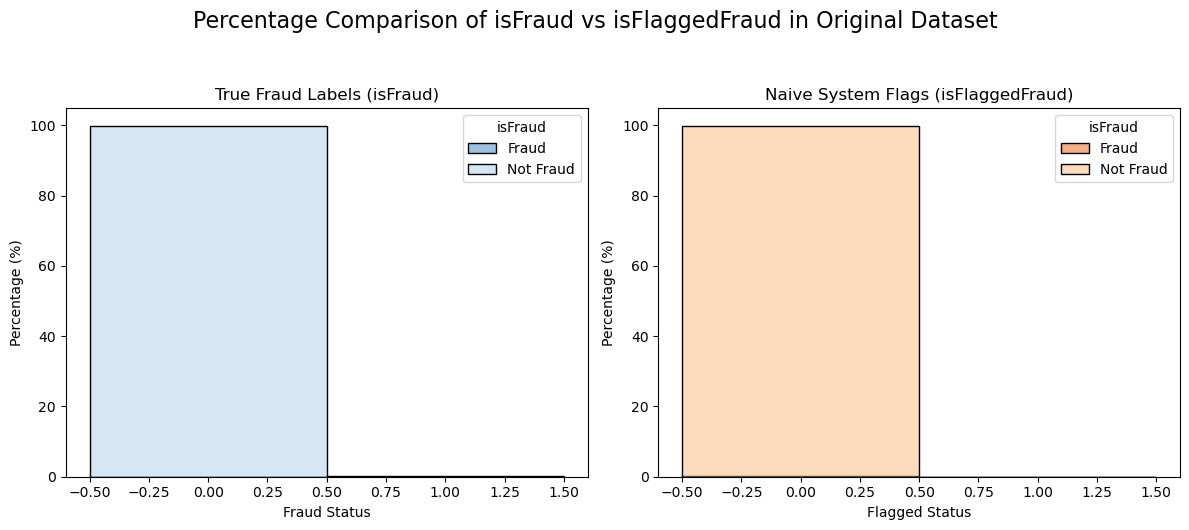

In [50]:
# bar graphs of isFruad and isFlaggedFraud from full dataset
plt.figure(figsize=(12, 5))

# Plot isFraud (percentages)
plt.subplot(1, 2, 1)
sns.histplot(x='isFraud', data=transacts_df, discrete=True, stat="percent", hue='isFraud', palette='Blues')
plt.title('True Fraud Labels (isFraud)')
plt.xlabel('Fraud Status')
plt.ylabel('Percentage (%)')
plt.legend(title='isFraud', labels=['Fraud', 'Not Fraud'])


# Plot isFlaggedFraud (percentages)
plt.subplot(1, 2, 2)
sns.histplot(x='isFlaggedFraud', data=transacts_df, discrete=True, stat="percent", hue='isFraud', palette='Oranges')
plt.title('Naive System Flags (isFlaggedFraud)')
plt.xlabel('Flagged Status')
plt.ylabel('Percentage (%)')
plt.legend(title='isFraud', labels=['Fraud', 'Not Fraud'])

plt.suptitle('Percentage Comparison of isFraud vs isFlaggedFraud in Original Dataset', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


## Q&A Based on Feature-Metric Findings

### What does this feature actually mean?  
- **`IsFlaggedFraud`**: A “naive” model that simply flags a transaction as fraudulent if the `Amount > 200,000` (note: this currency is not USD).  
- ✅ It’s a **rule-based system**—hard-coded logic with no learning or adaptation.  
- ✅ **isFraud**: The *true simulated fraud label*. A transaction is considered fraudulent if it represents a malicious attempt to transfer funds out of a victim’s account **before the account owner could secure their information**. This is the target variable for training machine learning models.

---

### Why was it there?  
- 📦 This was the bank’s **legacy fraud detection system**—a quick fix meant to catch only *large* transactions.  
- 💪 My company was brought in because this method is **clearly inadequate** for modern fraud patterns.  

---

### How does it behave in reality?  
- 📊 According to EDA output:  
  - Out of 1,000,000 transactions, **only 1** was flagged as fraudulent by this system.  
  - ⚠️ It missed **1,296 actual fraud cases** that were **under the 200,000 threshold**.  
  - 🚨 This shows **near-zero recall**—the system is blind to smaller but still damaging fraud.  

---

### 📝Takeaway  
The legacy system’s naive approach is **insufficient** for modern fraud detection.  
✔️ Our ML pipeline will replace it with a smarter, adaptive model that can detect fraud **across all transaction amounts and types**, not just big-ticket transfers.


In [51]:
# TODO: Begin your EDA
df_sample.describe()

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,1.791194e+05,8.364482e+05,8.573673e+05,1.086703e+06,1.210363e+06,0.001300,0.0
std,6.101525e+05,2.893953e+06,2.929282e+06,3.243233e+06,3.496229e+06,0.036032,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.341472e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,7.438970e+04,1.377997e+04,0.000000e+00,1.353629e+05,2.183825e+05,0.000000,0.0
75%,2.083385e+05,1.073378e+05,1.425641e+05,9.399594e+05,1.111442e+06,0.000000,0.0
max,6.096528e+07,3.471830e+07,3.477257e+07,3.114049e+08,3.114929e+08,1.000000,0.0


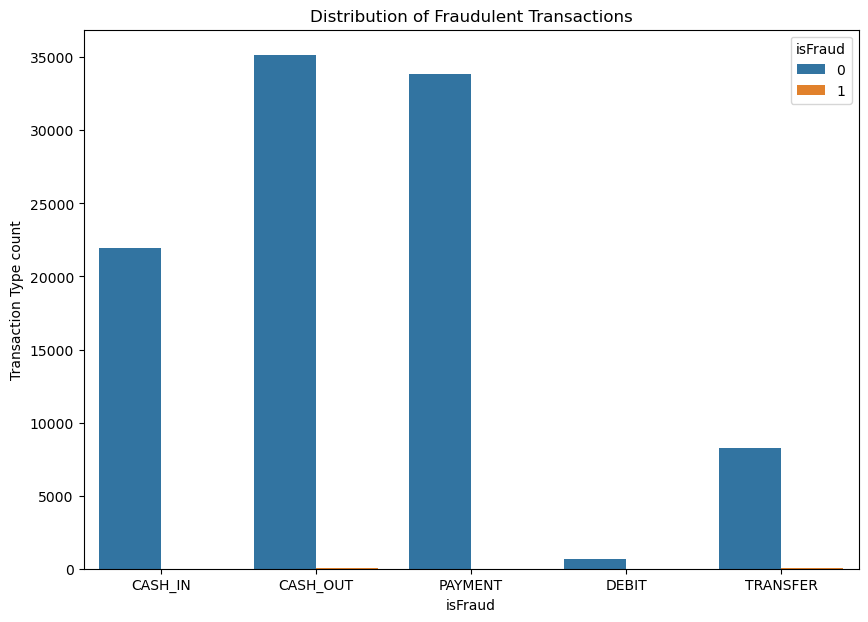

In [52]:
# countplot of 'Type' column
plt.figure(figsize=(10, 7))
sns.countplot(data=df_sample, x='type', hue='isFraud')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('isFraud')
plt.ylabel('Transaction Type count')
plt.show()

## Initial Observations:
- Both CASH_IN AND PAYMENT shows very few Fraud cases, with blue bars dominating.
- Both CASH_OUT and TRANSFER shows some Fraud present with visible tiny orange bars.
  - These categories may be useful in feature engineering 
  - Possbile candidates for predictors?

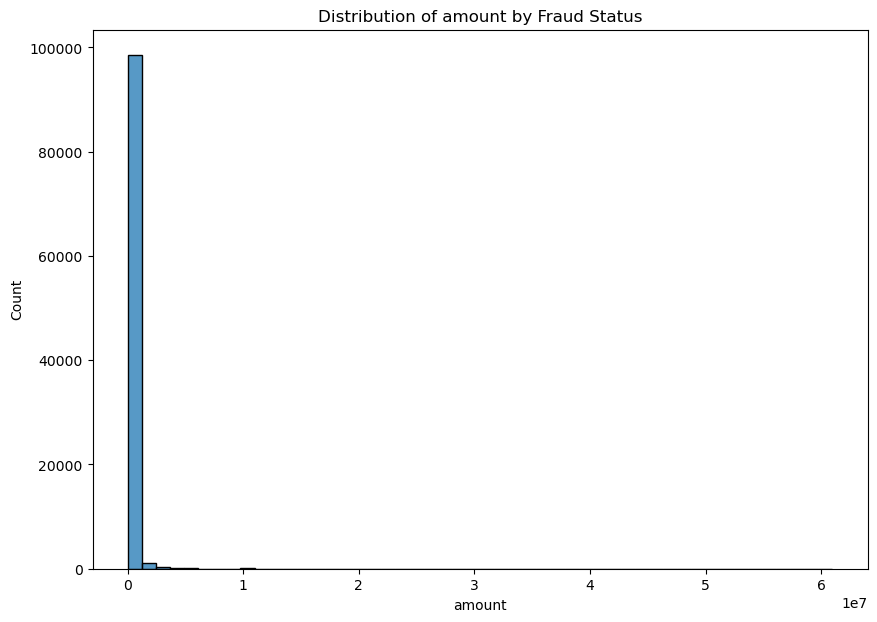

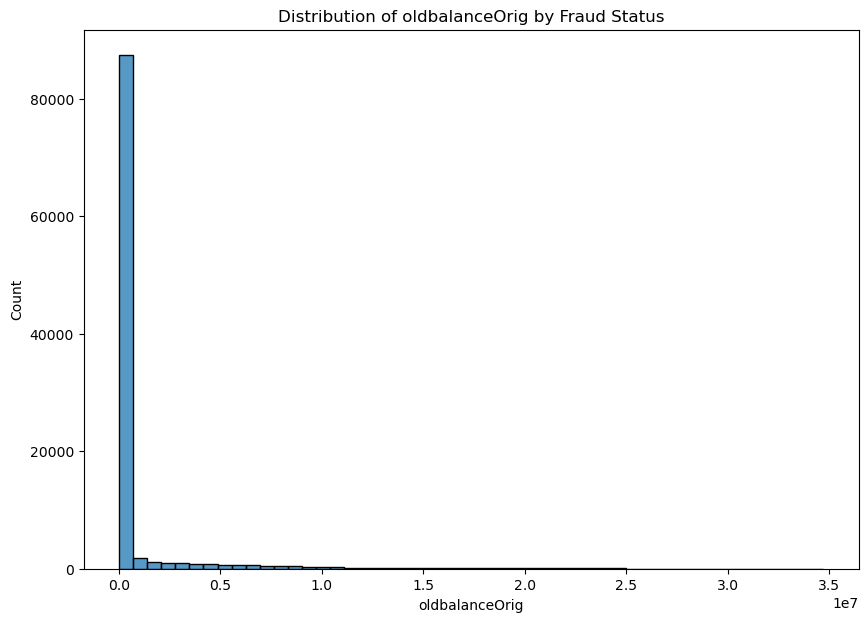

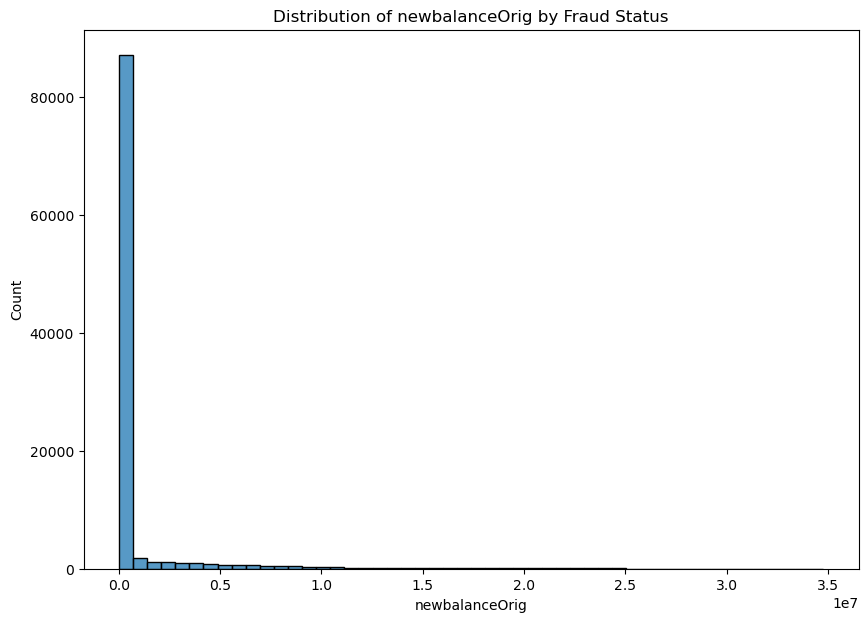

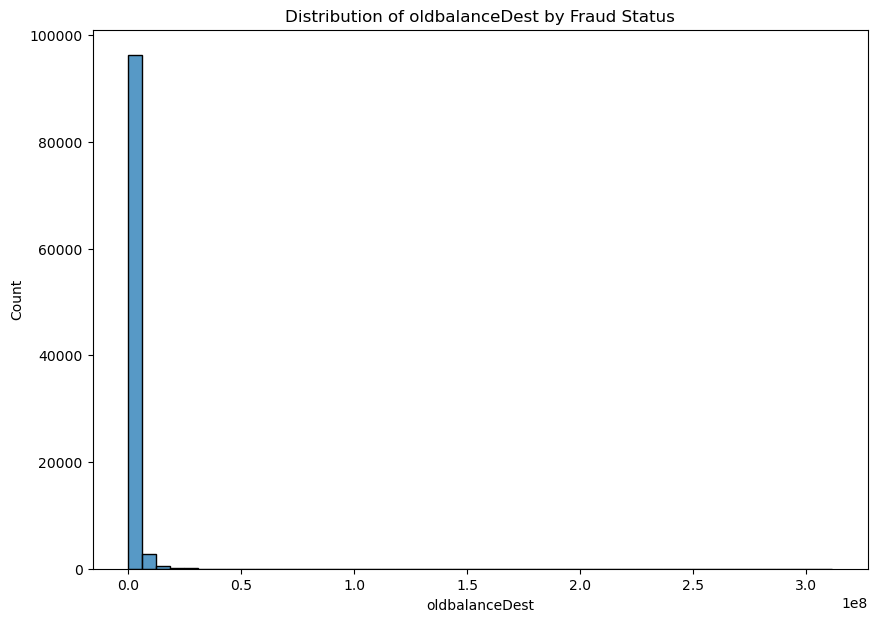

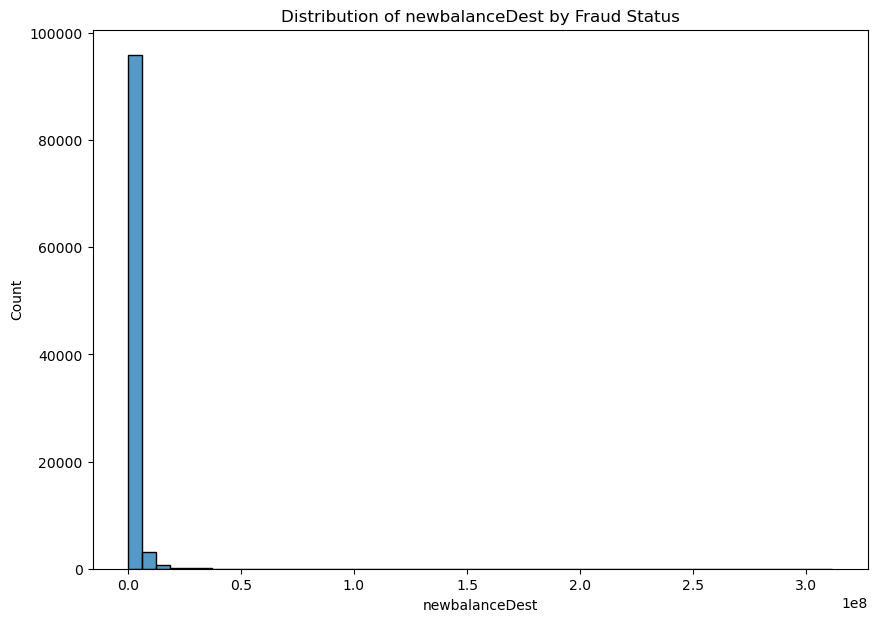

In [54]:
# histograms of the following: amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest
for col in ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    plt.figure(figsize=(10, 7))
    sns.histplot(data=df_sample, x=col, bins=50)
    plt.title(f"Distribution of {col} by Fraud Status")
    plt.xlabel(f"{col}")
    plt.show()



## Initial Findis form Histogram plots

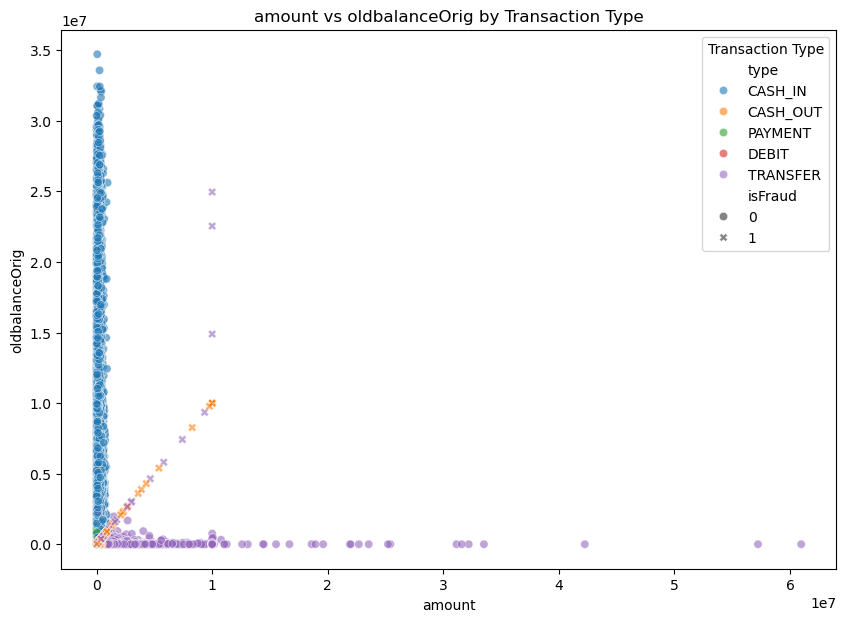

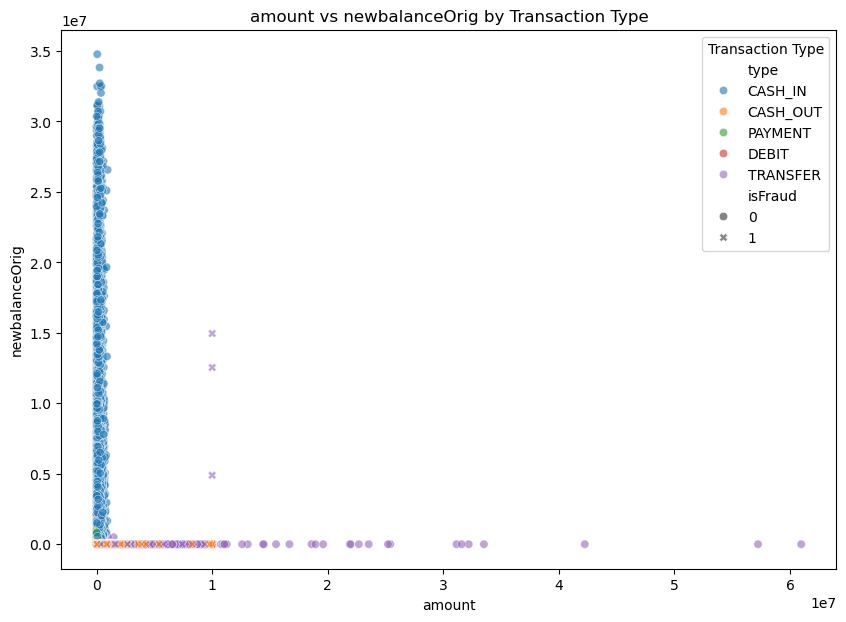

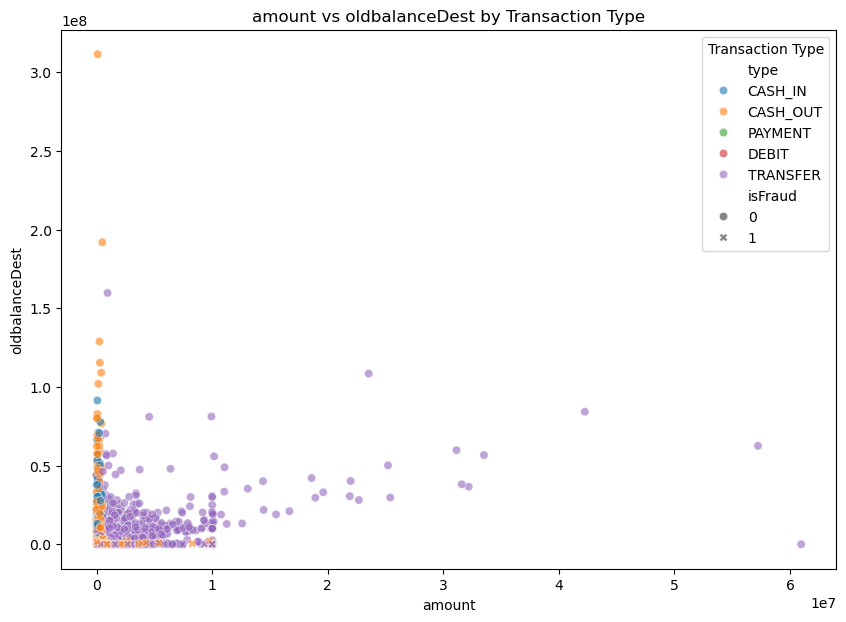

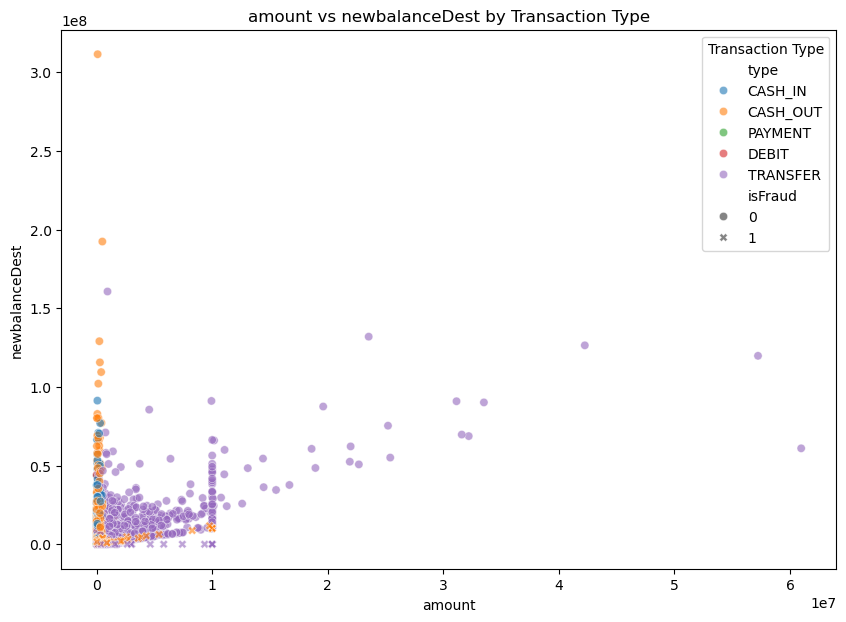

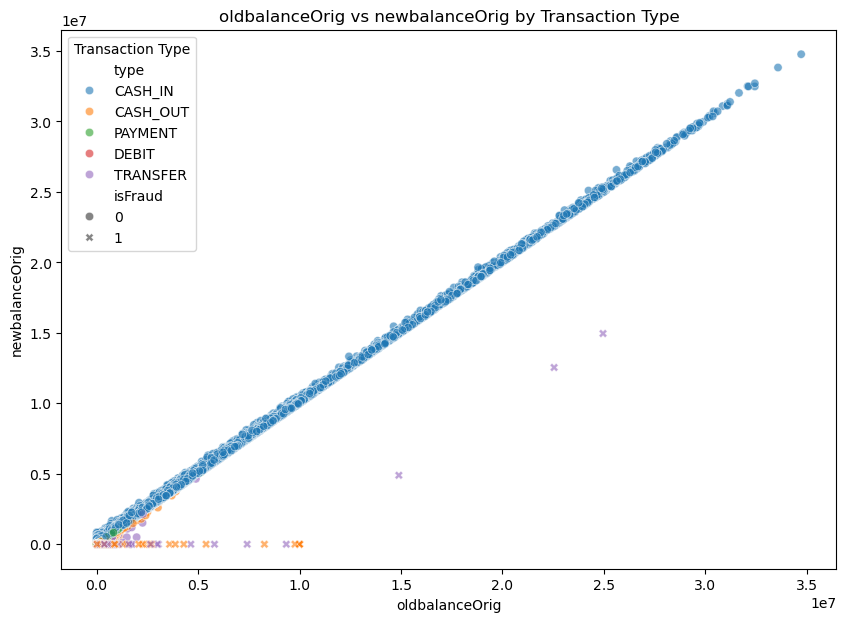

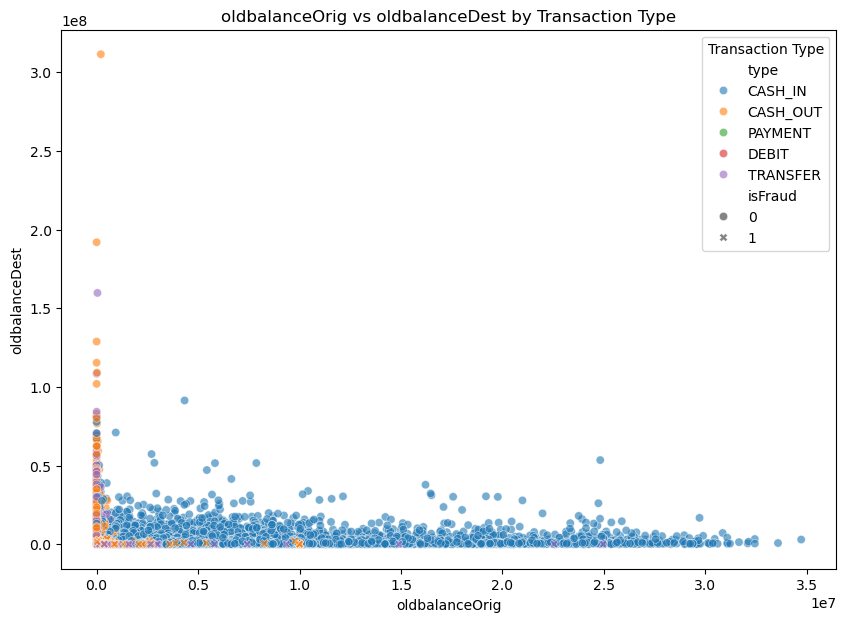

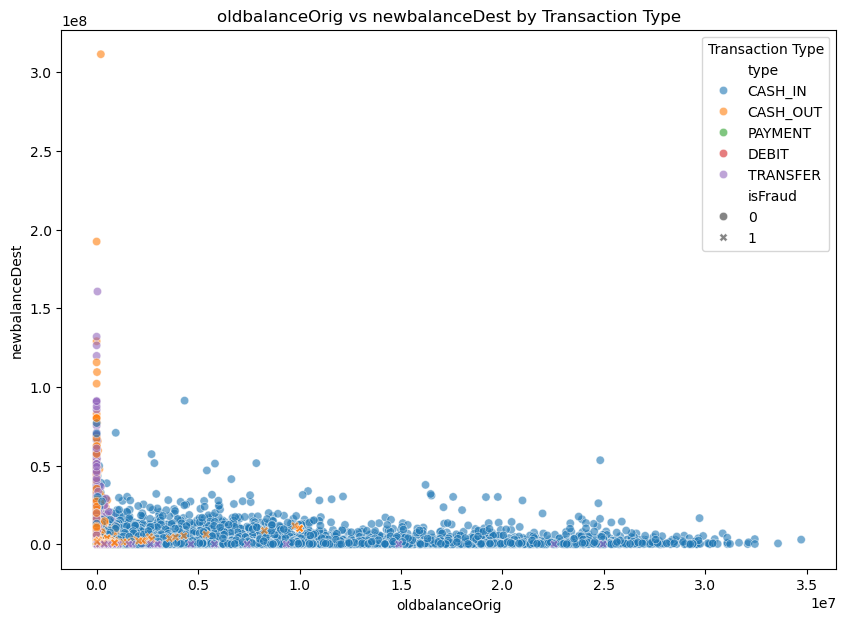

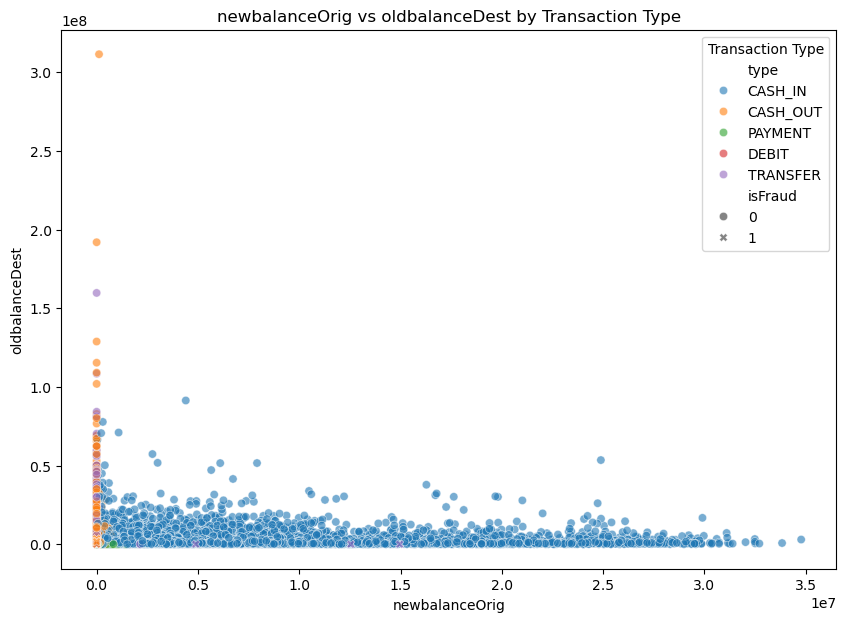

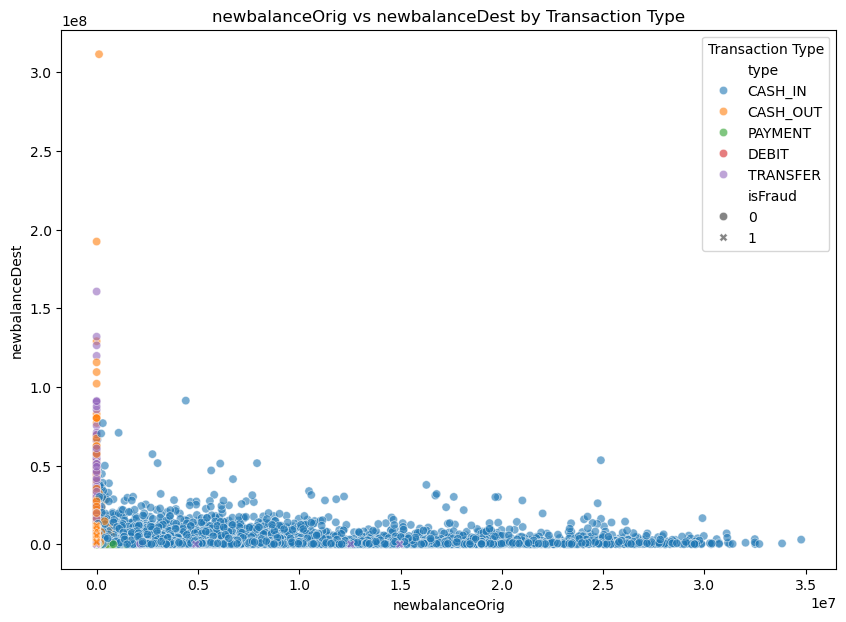

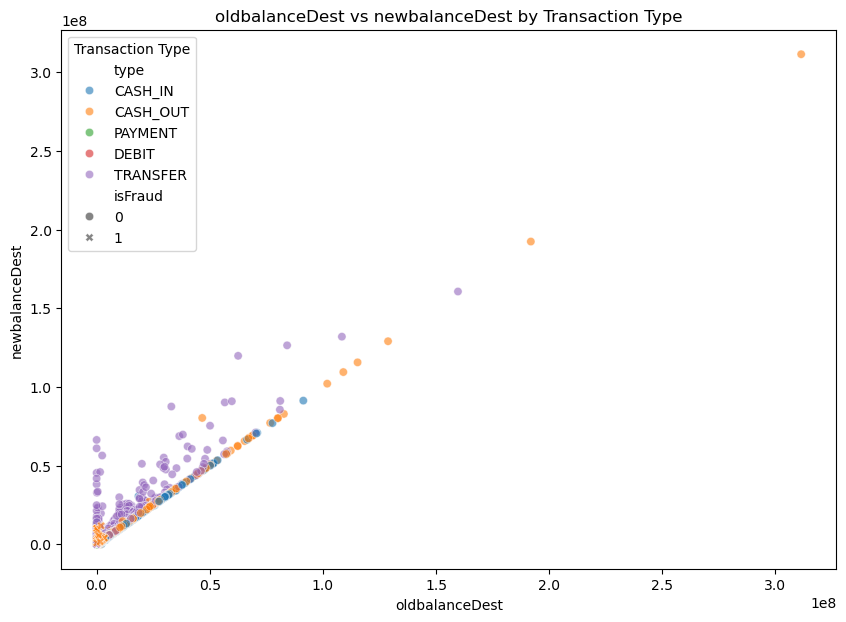

In [60]:
# Pairwise scatter plots with Type as hue
num_cols = ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        plt.figure(figsize=(10, 7))
        sns.scatterplot(
            data=df_sample, 
            x=num_cols[i], 
            y=num_cols[j], 
            style='isFraud',
            hue='type',
            alpha=0.6,
            palette='tab10'
        )
        plt.title(f"{num_cols[i]} vs {num_cols[j]} by Transaction Type")
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.legend(title='Transaction Type')
        plt.show()


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here